In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
df=pd.read_csv('heart_attack_dataset.csv')



In [8]:
df.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication


UNDERSTANDING THE DATA


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.describe()

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL)
count,1000.000000,1000.000000,1000.000000
mean,60.338000,145.440000,223.789000
std,17.317496,31.756525,42.787817
min,30.000000,90.000000,150.000000
25%,45.000000,118.000000,185.000000
50%,60.500000,146.000000,225.500000
75%,76.000000,173.000000,259.000000
max,89.000000,199.000000,299.000000


In [11]:
df.isnull().sum()

,0
Gender,0
Age,0
Blood Pressure (mmHg),0
Cholesterol (mg/dL),0
Has Diabetes,0
Smoking Status,0
Chest Pain Type,0
Treatment,0


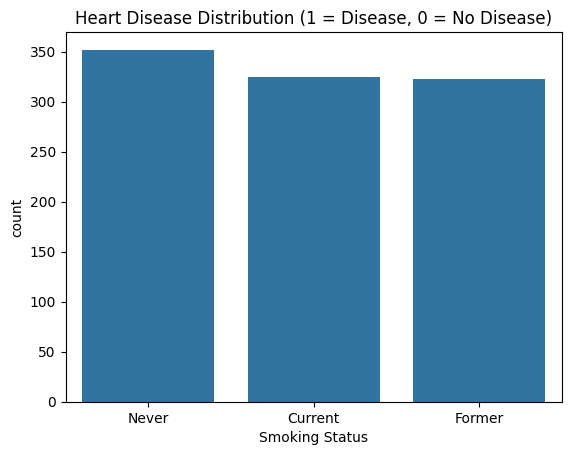

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
sns.countplot(x='Smoking Status', data=df)
plt.title("Heart Disease Distribution (1 = Disease, 0 = No Disease)")
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and label
X = df.drop('Has Diabetes', axis=1)
y = df['Treatment']

# Encode categorical columns if any
X = pd.get_dummies(X, drop_first=True)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Proceed with train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [29]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
[[48  0  0  0]
 [ 0 47  0  0]
 [ 0  0 52  0]
 [ 0  0  0 53]]
                                     precision    recall  f1-score   support

                        Angioplasty       1.00      1.00      1.00        48
Coronary Artery Bypass Graft (CABG)       1.00      1.00      1.00        47
                  Lifestyle Changes       1.00      1.00      1.00        52
                         Medication       1.00      1.00      1.00        53

                           accuracy                           1.00       200
                          macro avg       1.00      1.00      1.00       200
                       weighted avg       1.00      1.00      1.00       200



In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("RF Accuracy:", rf.score(X_test, y_test))


RF Accuracy: 1.0


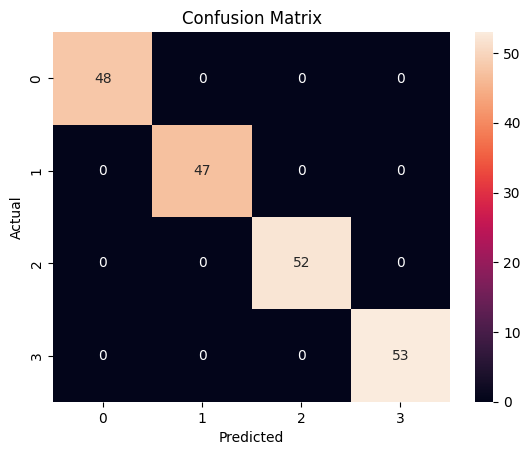

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
